In [ ]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install

In [ ]:
library(BiocManager)
BiocManager::install('R.utils')

In [ ]:
# load libraries
library(DESeq2)
library(tidyverse)
library(airway)


In [35]:
# load counts table from GEO
urld <- "https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts"
path <- paste(urld, "acc=GSE115081", "file=GSE115081_raw_counts_GRCh38.p13_NCBI.tsv.gz", sep="&");
tbl <- as.matrix(data.table::fread(path, header=T, colClasses="integer"), rownames=1)

In [36]:
tbl

,GSM3164863,GSM3164864,GSM3164865,GSM3164866,GSM3164867,GSM3164868,GSM3164869,GSM3164870,GSM3164871,GSM3164872,GSM3164873,GSM3164874
100287102,1,1,2,1,2,3,9,4,9,24,17,7
653635,520,619,600,424,605,626,468,386,298,1016,649,522
102466751,13,13,16,10,19,24,9,3,2,10,8,1
107985730,0,0,0,0,0,0,1,1,0,1,0,0
100302278,0,0,0,0,0,0,0,0,0,1,0,0
645520,0,0,1,0,3,2,1,1,1,0,0,1
79501,0,0,0,0,0,0,0,0,0,0,1,0
100996442,13,22,13,17,20,19,29,20,10,20,20,9
729737,32,35,48,32,28,42,31,25,21,53,38,30
102725121,0,2,1,4,3,10,25,11,25,69,46,15


In [38]:
# Eliminar las columnas deseadas
tbl <- tbl[, !colnames(tbl) %in% c("GSM3164869", "GSM3164870", "GSM3164871", "GSM3164872", "GSM3164873", "GSM3164874")]

# Crear un vector con los nuevos nombres de columna
new_colnames <- c("Caco-2 cells of no treatment group-1",
                  "Caco-2 cells of no treatment group-2", 
                  "Caco-2 cells of no treatment group-3",
                  "Caco-2 cells of B. subtilis CW14 treatment group-1",
                  "Caco-2 cells of B. subtilis CW14 treatment group-2",
                  "Caco-2 cells of B. subtilis CW14 treatment group-3")

# Cambiar los nombres de columna de la tabla
colnames(tbl) <- new_colnames
tbl
# Guardar la tabla modificada en un archivo CSV
write.csv(tbl, file = "counts_data.csv", row.names = TRUE)

,Caco-2 cells of no treatment group-1,Caco-2 cells of no treatment group-2,Caco-2 cells of no treatment group-3,Caco-2 cells of B. subtilis CW14 treatment group-1,Caco-2 cells of B. subtilis CW14 treatment group-2,Caco-2 cells of B. subtilis CW14 treatment group-3
100287102,1,1,2,1,2,3
653635,520,619,600,424,605,626
102466751,13,13,16,10,19,24
107985730,0,0,0,0,0,0
100302278,0,0,0,0,0,0
645520,0,0,1,0,3,2
79501,0,0,0,0,0,0
100996442,13,22,13,17,20,19
729737,32,35,48,32,28,42
102725121,0,2,1,4,3,10


In [42]:
# Step 1: preparing count data ----------------

# read in counts data
#counts_data <- read.csv('counts_data.csv')
counts_data <- tbl
head(counts_data)


# read in sample info
# Cargar el archivo "sample_info.csv"
colData <- read.csv("sample_info.csv")
colData

,Caco-2 cells of no treatment group-1,Caco-2 cells of no treatment group-2,Caco-2 cells of no treatment group-3,Caco-2 cells of B. subtilis CW14 treatment group-1,Caco-2 cells of B. subtilis CW14 treatment group-2,Caco-2 cells of B. subtilis CW14 treatment group-3
100287102,1,1,2,1,2,3
653635,520,619,600,424,605,626
102466751,13,13,16,10,19,24
107985730,0,0,0,0,0,0
100302278,0,0,0,0,0,0
645520,0,0,1,0,3,2


sample,condition
<chr>,<chr>
Caco-2 cells of no treatment group-1,control
Caco-2 cells of no treatment group-2,control
Caco-2 cells of no treatment group-3,control
Caco-2 cells of B. subtilis CW14 treatment group-1,treatment
Caco-2 cells of B. subtilis CW14 treatment group-2,treatment
Caco-2 cells of B. subtilis CW14 treatment group-3,treatment


In [43]:
# Step 2: construct a DESeqDataSet object ----------

dds <- DESeqDataSetFromMatrix(countData = counts_data,
                       colData = colData,
                       design = ~ condition)

dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


class: DESeqDataSet 
dim: 39376 6 
metadata(1): version
assays(1): counts
rownames(39376): 100287102 653635 ... 4576 4571
rowData names(0):
colnames(6): Caco-2 cells of no treatment group-1 Caco-2 cells of no
  treatment group-2 ... Caco-2 cells of B. subtilis CW14 treatment
  group-2 Caco-2 cells of B. subtilis CW14 treatment group-3
colData names(2): sample condition

In [44]:
# pre-filtering: removing rows with low gene counts
# keeping rows that have at least 10 reads total
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

dds

class: DESeqDataSet 
dim: 23741 6 
metadata(1): version
assays(1): counts
rownames(23741): 100287102 653635 ... 4576 4571
rowData names(0):
colnames(6): Caco-2 cells of no treatment group-1 Caco-2 cells of no
  treatment group-2 ... Caco-2 cells of B. subtilis CW14 treatment
  group-2 Caco-2 cells of B. subtilis CW14 treatment group-3
colData names(2): sample condition

In [46]:
# set the factor level
dds$condition <- relevel(dds$condition, ref = "control")
dds$condition

[1] control   control   control   treatment treatment treatment
Levels: control treatment

In [47]:
# NOTE: collapse technical replicates

# Step 3: Run DESeq ----------------------
dds <- DESeq(dds)
res <- results(dds)

res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition treatment vs control 
Wald test p-value: condition treatment vs control 
DataFrame with 23741 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat      pvalue        padj
          <numeric>      <numeric> <numeric>  <numeric>   <numeric>   <numeric>
100287102   1.62507     0.64812939  1.521433  0.4259993    0.670108          NA
653635    561.49171    -0.00158134  0.148123 -0.0106759    0.991482    0.998981
102466751  15.58532     0.39590937  0.518099  0.7641577    0.444773    0.778697
100996442  17.42435     0.29255383  0.496273  0.5895016    0.555525    0.839103
729737     35.66816    -0.09457831  0.347035 -0.2725328    0.785212    0.937065
...             ...            ...       ...        ...         ...         ...
4541       28706.57      -0.904070  0.149109   -6.06316 1.33474e-09 3.46926e-07
4556        2440.39      -1.257502  0.170041   -7.39530 1.41086e-13 7.45253e-11
4519       71863.87      -0.544493  0.124782   -4.363

In [48]:
# Explore Results ----------------

summary(res)


out of 23741 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 653, 2.8%
LFC < 0 (down)     : 594, 2.5%
outliers [1]       : 1, 0.0042%
low counts [2]     : 7365, 31%
(mean count < 16)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [49]:
res0.01 <- results(dds, alpha = 0.01)
summary(res0.01)


out of 23741 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 221, 0.93%
LFC < 0 (down)     : 189, 0.8%
outliers [1]       : 1, 0.0042%
low counts [2]     : 5984, 25%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [50]:
# contrasts
resultsNames(dds)


[1] "Intercept"                      "condition_treatment_vs_control"

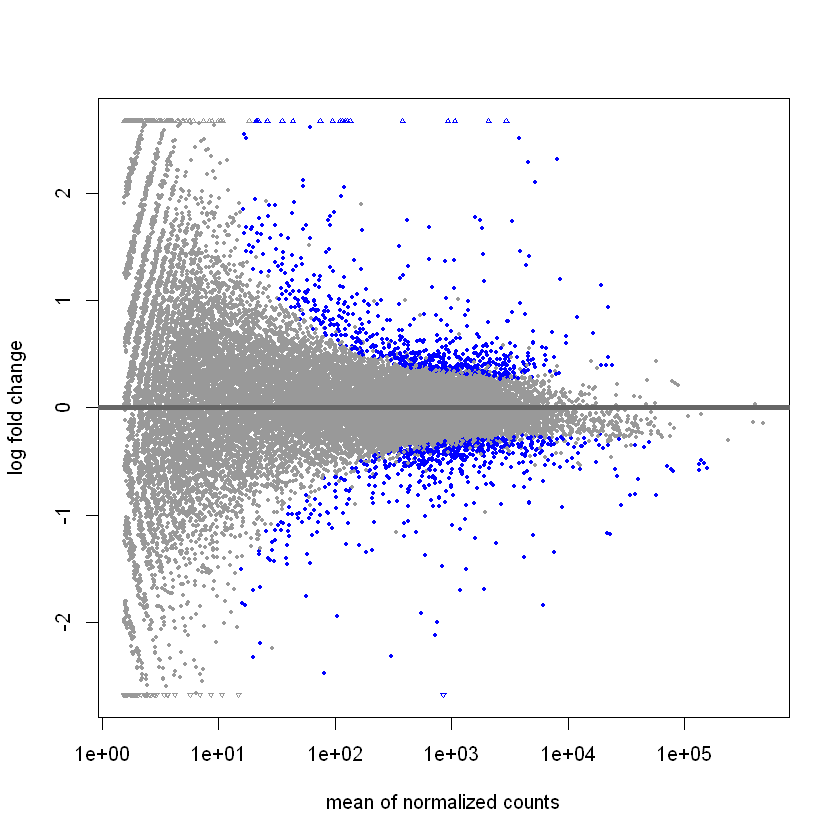

In [51]:
# MA plot
plotMA(res)